# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set url for API

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
response


{'coord': {'lon': 87.6167, 'lat': 22.8333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 27.84,
  'feels_like': 30.74,
  'temp_min': 27.84,
  'temp_max': 27.84,
  'pressure': 1008,
  'humidity': 73,
  'sea_level': 1008,
  'grnd_level': 1005},
 'visibility': 10000,
 'wind': {'speed': 3.91, 'deg': 174, 'gust': 8.98},
 'clouds': {'all': 0},
 'dt': 1619638040,
 'sys': {'country': 'IN', 'sunrise': 1619653087, 'sunset': 1619699727},
 'timezone': 19800,
 'id': 1258658,
 'name': 'Rāmjībanpur',
 'cod': 200}

In [ ]:
# Set empty lists

city_list = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudlness = []
wind_speed = []
country = []
date = []

#Loop through each citiy
print(f'Beginning Data Retrieval')
print('---------------------------')

for index, city in enumerate (cities, start =1):
    
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])                         
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudlness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        x = len(cities)                     
        print(f'Processing Record:{index}  | {city}')
        
    except (KeyError):
        print(f'City not found. Skipping...')
       
    
print('---------------------------')
print(f'Data Retrieval Complete ')
print('---------------------------')


Beginning Data Retrieval
---------------------------
City not found. Skipping...
Processing Record:2  | rikitea
Processing Record:3  | coihaique
Processing Record:4  | pisco
Processing Record:5  | planaltina
Processing Record:6  | marawi
Processing Record:7  | busselton
Processing Record:8  | esso
Processing Record:9  | vaini
Processing Record:10  | ushuaia
Processing Record:11  | kargat
Processing Record:12  | ribeira grande
Processing Record:13  | jamestown
Processing Record:14  | hermanus
Processing Record:15  | elk point
Processing Record:16  | reconquista
City not found. Skipping...
Processing Record:18  | marsa matruh
City not found. Skipping...
City not found. Skipping...
Processing Record:21  | nhulunbuy
Processing Record:22  | albany
Processing Record:23  | cape town
Processing Record:24  | vanimo
Processing Record:25  | kisanga
Processing Record:26  | mataura
Processing Record:27  | hithadhoo
Processing Record:28  | avarua
Processing Record:29  | bluff
Processing Record:30  |

Processing Record:245  | lima
Processing Record:246  | siwana
Processing Record:247  | biak
Processing Record:248  | vila franca do campo
Processing Record:249  | fergus falls
Processing Record:250  | vikhorevka
Processing Record:251  | veraval
Processing Record:252  | ban nahin
City not found. Skipping...
Processing Record:254  | fort-shevchenko
Processing Record:255  | kavieng
City not found. Skipping...
Processing Record:257  | lasa
Processing Record:258  | xuanhua
Processing Record:259  | anadyr
Processing Record:260  | norman wells
Processing Record:261  | chenzhou
Processing Record:262  | gallup
Processing Record:263  | bonavista
Processing Record:264  | la asuncion
Processing Record:265  | alugan
Processing Record:266  | pando
Processing Record:267  | caraballeda
Processing Record:268  | mingyue
Processing Record:269  | forbes
Processing Record:270  | boulder city
Processing Record:271  | viedma
City not found. Skipping...
Processing Record:273  | anan
Processing Record:274  | a

Processing Record:488  | north platte
Processing Record:489  | gisborne
Processing Record:490  | alta floresta
Processing Record:491  | jennings
Processing Record:492  | barra do corda
Processing Record:493  | rexburg
Processing Record:494  | salinopolis
Processing Record:495  | ribeira brava
Processing Record:496  | tabuk
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record:500  | ratnagiri
City not found. Skipping...
Processing Record:502  | velyka mykhaylivka
Processing Record:503  | kenitra
Processing Record:504  | shitanjing
Processing Record:505  | saint-nazaire
Processing Record:506  | santa barbara
Processing Record:507  | yemtsa
Processing Record:508  | olafsvik
Processing Record:509  | karaton
Processing Record:510  | north myrtle beach
City not found. Skipping...
Processing Record:512  | acucena
City not found. Skipping...
City not found. Skipping...
Processing Record:515  | batemans bay
Processing Record:516  | nalut
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#Create DataFrame

weather_df = pd.DataFrame({'City': city_list,'Lat': lat_list,'Lng': lng_list,'Max Temp': max_temp,'Humidity': humidity,'Cloudlness': cloudlness,'Wind Speed': wind_speed,'Country': country,'Date': date})

weather_df.head()


In [ ]:
# output city data 

weather_df.to_csv('output_data/cities.csv', index = False)

In [ ]:
weather_df.describe()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
humidity_check = weather_df.loc[weather_df['Humidity'] > 100]['Humidity'].count()
    
print('There are cities that have humidity greater than 100%:',humidity_check)

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
* The temperature reaches the highest point between latitudes 0 and 20
* Temperature starts fall when latitude increases

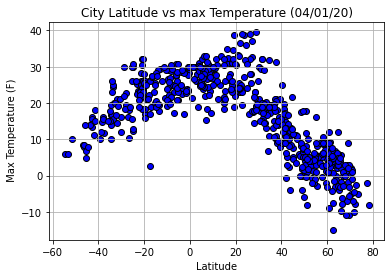

In [38]:
#Build a scatter plot 

fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = 'o', color = 'blue', edgecolor='black')


# Incorporate the other graph properties

plt.title("City Latitude vs max Temperature (04/01/20)")
plt.ylabel(" Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image as .pngs

plt.savefig('output_data/latitude vs temperature.png')

# Show plot
plt.show()




## Latitude vs. Humidity Plot

In [30]:
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

SyntaxError: invalid syntax (<ipython-input-30-e78d23dbfda8>, line 1)

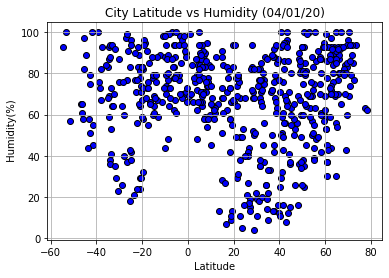

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker = 'o',color = 'blue', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (04/01/20)")
plt.ylabel(" Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image as .pngs

plt.savefig('output_data/latitude vs humidity.png')

# Show plot
plt.show()



## Latitude vs. Cloudiness Plot

In [ ]:
* The relationship between latitude and cloudiness across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

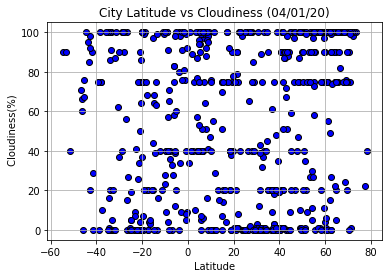

In [40]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(weather_df['Lat'], weather_df['Cloudlness'], marker = 'o', color = 'blue', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (04/01/20)")
plt.ylabel(" Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image as .pngs

plt.savefig('output_data/latitude vs cloudiness.png')

# Show plot
plt.show()



## Latitude vs. Wind Speed Plot

In [ ]:
* The relationship between latitude and wind speed across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

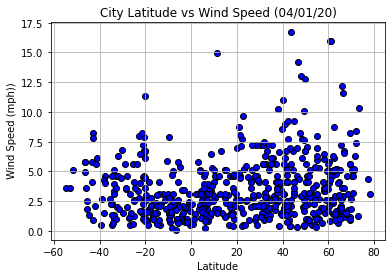

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker = 'o',color = 'blue', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (04/01/20)")
plt.ylabel(" Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image as .pngs

plt.savefig('output_data/latitude vs wind speed.png')

# Show plot
plt.show()


## Linear Regression

In [ ]:
n_hemisphere = weather_df.loc[weather_df['Lat'] >= 0]
s_hemisphere = weather_df.loc[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
* The plot shows that there are stronger negative relationship between Northern Hemisphere max temp and latitude. 
* r-squared is 77.93 % indicate variables which can be considered highly coorelated and stronger fit. 


In [ ]:
x = n_hemisphere['Lat']
y = n_hemisphere['Max Temp']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,xy=(0,0),fontsize=20, color="red", xytext = (5,-15))
plt.title("Northtern Hemisphere - Max Temp vs Latitude")
plt.ylabel("Max Temp ")
plt.xlabel("Latitude")


# Show plot
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
* The plot shows that there are negative relationship between Southern Hemisphere max temp and latitude. 
* r-squared is 47.23 % is lower than midpoint that is not stronger fit.

In [ ]:
x = s_hemisphere['Lat']
y = s_hemisphere['Max Temp']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values , '-r')

# Incorporate the other graph properties
plt.annotate(line_eq, xy = (-55,26),fontsize=20, color="red")
plt.title("Southtern Hemisphere - Max Temp vs Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")


# Show plot
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
* The r-squared is 4.74 % is not stronger fit. 
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

In [ ]:
x = n_hemisphere['Lat']
y = n_hemisphere['Humidity']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,xy = (35,10),fontsize=20, color="red", )
plt.title("Northtern Hemisphere - Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Show plot
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
* The r-squared is 4.74 % is not stronger fit. 
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

In [ ]:
x = s_hemisphere['Lat']
y = s_hemisphere['Humidity']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(-35,45),fontsize=20, color="red", )
plt.title("Southtern Hemisphere - Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Show plot
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
** The r-squared is 2.61 % is not stronger fit. 
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

In [ ]:
x = n_hemisphere['Lat']
y = n_hemisphere['Cloudlness']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(25,25),fontsize=20, color="red", )
plt.title("Northtern Hemisphere - Cloudiness vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")


# Show plot
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
* The r-squared is below zero not stronger fit. 
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to show the relationship between two variables. 

In [ ]:
x = s_hemisphere['Lat']
y = s_hemisphere['Cloudlness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(-55,20),fontsize=20, color="red", )
plt.title("Southtern Hemisphere - Cloudlness vs Latitude")
plt.ylabel("Cloudlness")
plt.xlabel("Latitude")

# Show plot
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
* The r-squared is 0.80 % not stronger fit. 
* There is no obvious pattern to show the relationship between two variables. 

In [ ]:
x = n_hemisphere['Lat']
y = n_hemisphere['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(10,15),fontsize=20, color="red", )
plt.title("Northtern Hemisphere - Wind Speed vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")


# Show plot
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
* The r-squared is 6.89% not stronger fit. 
* There is no obvious pattern to show the relationship between two variables. 

In [ ]:
x = s_hemisphere['Lat']
y = s_hemisphere['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(-50,9),fontsize=20, color="red", )
plt.title("Southtern Hemisphere - Wind Speed vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")


# Show plot
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")